<a href="https://colab.research.google.com/github/vianelk/ax-metrics/blob/feat%2Fdata_preprocessing/ax_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Download dataset

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumithsingh/blood-cell-images-for-cancer-detection")

print("Path to dataset files:", path)

100%|██████████| 122M/122M [00:01<00:00, 119MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sumithsingh/blood-cell-images-for-cancer-detection/versions/2


In [24]:
DATASET_PATH = './kaggle/input/blood-cell-images-for-cancer-detection'

In [26]:
!mkdir -p {DATASET_PATH}

!cp -r {path}/* {DATASET_PATH}/

# Setup Project Config

Set random seed

In [30]:
SEED = 42
np.random.seed(SEED)

List classes

In [28]:
CLASSES = ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']

Define image size

In [29]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

# Data Preprocessing

## Quick Exploration

View number of images per class

In [31]:
for class_name in CLASSES:
    print(f"{class_name}: {len(os.listdir(os.path.join(DATASET_PATH, class_name)))} images")

basophil: 1000 images
erythroblast: 1000 images
monocyte: 1000 images
myeloblast: 1000 images
seg_neutrophil: 1000 images


Load data

In [45]:
images = []
labels = []

In [46]:
any_corrupted_files = False

for class_index, class_name in enumerate(CLASSES):
    folder_path = os.path.join(DATASET_PATH, class_name)
    for img_file in os.listdir(folder_path):
        try:
            img = cv2.imread(os.path.join(folder_path, img_file))
            img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
            images.append(img)
            labels.append(class_index)
        except:
            any_corrupted_files = True
            print(f"Corrupt file: {img_file}")

if not any_corrupted_files:
    print("No corrupted files")

images = np.array(images)
labels = np.array(labels)

No corrupted files


Normalize images

array([[[169, 162, 197],
        [171, 162, 202],
        [176, 166, 208],
        ...,
        [176, 189, 224],
        [189, 218, 241],
        [192, 222, 247]],

       [[180, 171, 209],
        [182, 189, 219],
        [191, 211, 233],
        ...,
        [182, 196, 231],
        [192, 221, 244],
        [191, 221, 246]],

       [[195, 222, 239],
        [198, 230, 250],
        [194, 230, 254],
        ...,
        [179, 192, 227],
        [191, 220, 243],
        [192, 222, 247]],

       ...,

       [[203, 229, 253],
        [203, 229, 253],
        [203, 229, 253],
        ...,
        [170, 181, 214],
        [177, 188, 220],
        [171, 183, 215]],

       [[204, 230, 254],
        [203, 229, 253],
        [202, 228, 252],
        ...,
        [184, 219, 240],
        [187, 218, 244],
        [187, 211, 242]],

       [[196, 232, 255],
        [199, 231, 255],
        [201, 231, 255],
        ...,
        [192, 215, 247],
        [190, 214, 244],
        [188, 212, 240]]], dtype=uint8)
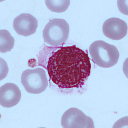

In [47]:
images[0]

In [48]:
images = images / 255.0

In [49]:
images[0]

array([[[0.6627451 , 0.63529412, 0.77254902],
        [0.67058824, 0.63529412, 0.79215686],
        [0.69019608, 0.65098039, 0.81568627],
        ...,
        [0.69019608, 0.74117647, 0.87843137],
        [0.74117647, 0.85490196, 0.94509804],
        [0.75294118, 0.87058824, 0.96862745]],

       [[0.70588235, 0.67058824, 0.81960784],
        [0.71372549, 0.74117647, 0.85882353],
        [0.74901961, 0.82745098, 0.91372549],
        ...,
        [0.71372549, 0.76862745, 0.90588235],
        [0.75294118, 0.86666667, 0.95686275],
        [0.74901961, 0.86666667, 0.96470588]],

       [[0.76470588, 0.87058824, 0.9372549 ],
        [0.77647059, 0.90196078, 0.98039216],
        [0.76078431, 0.90196078, 0.99607843],
        ...,
        [0.70196078, 0.75294118, 0.89019608],
        [0.74901961, 0.8627451 , 0.95294118],
        [0.75294118, 0.87058824, 0.96862745]],

       ...,

       [[0.79607843, 0.89803922, 0.99215686],
        [0.79607843, 0.89803922, 0.99215686],
        [0.79607843, 0

Convert labels to categorical format

In [50]:
labels[:5]

array([0, 0, 0, 0, 0])

In [51]:
labels = to_categorical(labels, num_classes=len(CLASSES))

In [52]:
labels[:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])